# 6. kNN Regression

**KI1-Projekt 308** — California Housing Datensatz

**Schwerpunkt P4:** k-Nearest Neighbors Regression,
Skalierungseffekte, Wahl von k.

Vorlage: Kapitel 6.4.1 Non-parametric kNN Regression

In [1]:
import sys
sys.path.insert(0, '..')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

from utils.data import load_and_clean_data, get_train_test_split
from utils.evaluation import evaluate_model, add_result
from utils.plotting import plot_predicted_vs_actual, plot_residuals, save_fig

plt.rcParams['figure.dpi'] = 100
%matplotlib inline

## 6.1 Daten laden (mit Skalierung)

kNN ist distanzbasiert → Skalierung ist essentiell!

In [2]:
df = load_and_clean_data()

# Ohne Skalierung (zum Vergleich)
X_train, X_test, y_train, y_test, feature_names = get_train_test_split(df)

# Mit StandardScaler
X_train_s, X_test_s, y_train_s, y_test_s, scaler, fn = get_train_test_split(df, scaler='standard')

## 6.2 Effekt der Skalierung

In [3]:
knn_raw = KNeighborsRegressor(n_neighbors=5)
knn_raw.fit(X_train, y_train)
result_raw = evaluate_model(knn_raw, X_train, X_test, y_train, y_test, "kNN (k=5, ohne Skalierung)")
add_result(result_raw)

knn_scaled = KNeighborsRegressor(n_neighbors=5)
knn_scaled.fit(X_train_s, y_train_s)
result_scaled = evaluate_model(knn_scaled, X_train_s, X_test_s, y_train_s, y_test_s, "kNN (k=5, Standard)")
add_result(result_scaled)


  kNN (k=5, ohne Skalierung)
  R² Score:  Train = 0.3954  |  Test = 0.0658
  MAE:       Train = 0.5841  |  Test = 0.7210
  RMSE:      Train = 0.7468  |  Test = 0.9214

  kNN (k=5, Standard)
  R² Score:  Train = 0.7848  |  Test = 0.6627
  MAE:       Train = 0.3155  |  Test = 0.3981
  RMSE:      Train = 0.4455  |  Test = 0.5536


## 6.3 Optimales k finden

Gespeichert: results/knn_k_tuning.png und results/knn_k_tuning.pdf


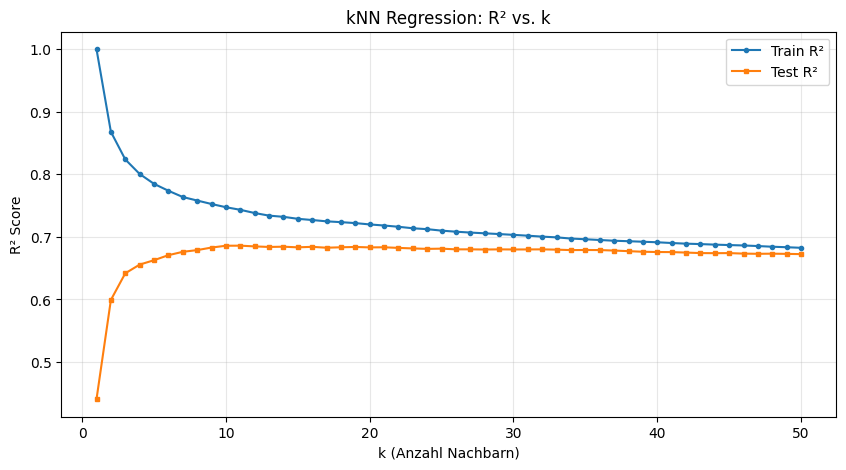

Bestes k: 11 (Test R² = 0.6860)


In [4]:
k_values = range(1, 51)
train_scores = []
test_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_s, y_train_s)
    train_scores.append(knn.score(X_train_s, y_train_s))
    test_scores.append(knn.score(X_test_s, y_test_s))

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(list(k_values), train_scores, 'o-', label='Train R²', markersize=3)
ax.plot(list(k_values), test_scores, 's-', label='Test R²', markersize=3)
ax.set_xlabel('k (Anzahl Nachbarn)')
ax.set_ylabel('R² Score')
ax.set_title('kNN Regression: R² vs. k')
ax.legend()
ax.grid(True, alpha=0.3)
save_fig(fig, 'knn_k_tuning')
plt.show()

best_k = list(k_values)[np.argmax(test_scores)]
print(f"Bestes k: {best_k} (Test R² = {max(test_scores):.4f})")

## 6.4 Gewichtungsvarianten

In [5]:
# Uniform vs. Distance Weighting
for weights in ['uniform', 'distance']:
    knn = KNeighborsRegressor(n_neighbors=best_k, weights=weights)
    knn.fit(X_train_s, y_train_s)
    result = evaluate_model(
        knn, X_train_s, X_test_s, y_train_s, y_test_s,
        f"kNN (k={best_k}, {weights}, Standard)"
    )
    add_result(result)


  kNN (k=11, uniform, Standard)
  R² Score:  Train = 0.7433  |  Test = 0.6860
  MAE:       Train = 0.3476  |  Test = 0.3844
  RMSE:      Train = 0.4866  |  Test = 0.5342

  kNN (k=11, distance, Standard)
  R² Score:  Train = 1.0000  |  Test = 0.6891
  MAE:       Train = 0.0000  |  Test = 0.3817
  RMSE:      Train = 0.0000  |  Test = 0.5315


Gespeichert: results/knn_pred_vs_actual.png und results/knn_pred_vs_actual.pdf


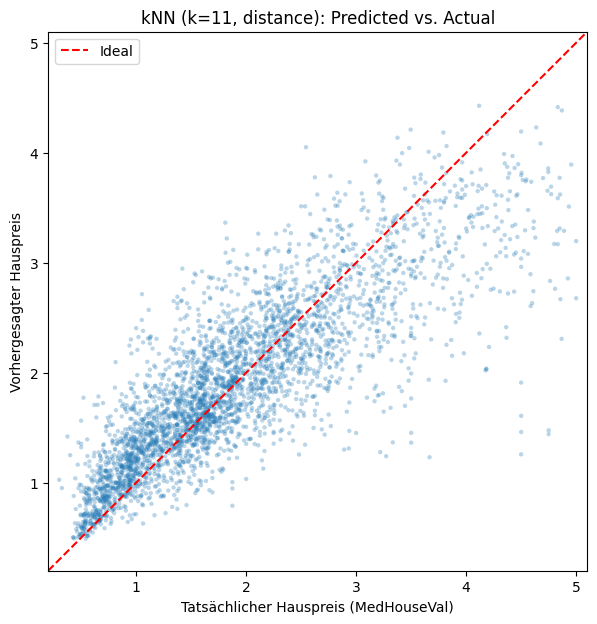

In [6]:
# Bestes kNN-Modell visualisieren
knn_best = KNeighborsRegressor(n_neighbors=best_k, weights='distance')
knn_best.fit(X_train_s, y_train_s)

fig, ax = plot_predicted_vs_actual(
    y_test_s, knn_best.predict(X_test_s),
    title=f"kNN (k={best_k}, distance): Predicted vs. Actual",
    save_name="knn_pred_vs_actual"
)
plt.show()

## 6.5 Zusammenfassung

| Erkenntnis | Detail |
|-----------|--------|
| Skalierung | Essentiell für kNN (distanzbasiert) |
| Optimales k | Bias-Varianz-Tradeoff |
| Distance Weighting | Oft leichte Verbesserung |
| Rechenzeit | Langsamer als lineare Modelle bei Vorhersage |